In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('vgames2.csv')
df = df.drop(df.columns[0],axis=1)




con1 = df['Year'] < 30
con2 = (df['Year'] > 30) & (df['Year']<100)

df.Publisher.fillna('Unknown', inplace= True)
df.Genre.fillna('Unknown', inplace= True)     #publisher genre 결측치 Unknown으로 처리

def myyear(x):
  if x < 30:
    return x+2000
  elif x< 100:
    return x+1900
  else:
    return x

df['Year'] = df['Year'].apply(myyear)   #Year 통일(19xx 20xx)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df.NA_Sales = df.NA_Sales.replace('[KM]','',regex=True).astype(float) * df.NA_Sales.str.extract('([kmKM])', expand = False).fillna(10**6).replace(['k','K','m','M'],[10**3, 10**3, 10**6, 10**6]).astype(int)
df.EU_Sales = df.EU_Sales.replace('[KM]','',regex=True).astype(float) * df.EU_Sales.str.extract('([kmKM])', expand = False).fillna(10**6).replace(['k','K','m','M'],[10**3, 10**3, 10**6, 10**6]).astype(int)
df.JP_Sales = df.JP_Sales.replace('[KM]','',regex=True).astype(float) * df.JP_Sales.str.extract('([kmKM])', expand = False).fillna(10**6).replace(['k','K','m','M'],[10**3, 10**3, 10**6, 10**6]).astype(int)
df.Other_Sales = df.Other_Sales.replace('[KM]','',regex=True).astype(float) * df.Other_Sales.str.extract('([kmKM])', expand = False).fillna(10**6).replace(['k','K','m','M'],[10**3, 10**3, 10**6, 10**6]).astype(int)

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


In [ ]:
#지역에 따라서 선호하는 게임 장르가 다를까
df1 = df.groupby('Genre').sum().drop("Year", axis=1).drop(["Misc","Unknown"])
df1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,874810000.0,522160000.0,157900000.0,186450000.0
Sports,680520000.0,376480000.0,135370000.0,134670000.0
Shooter,581920000.0,313050000.0,38280000.0,102650000.0
Platform,446440000.0,201610000.0,130650000.0,51530000.0
Racing,357190000.0,237100000.0,56400000.0,77100000.0
Role-Playing,319540000.0,183580000.0,344950000.0,56960000.0
Fighting,223200000.0,101220000.0,87340000.0,36640000.0
Simulation,182960000.0,113350000.0,63700000.0,31480000.0
Puzzle,123350000.0,50730000.0,56870000.0,12520000.0


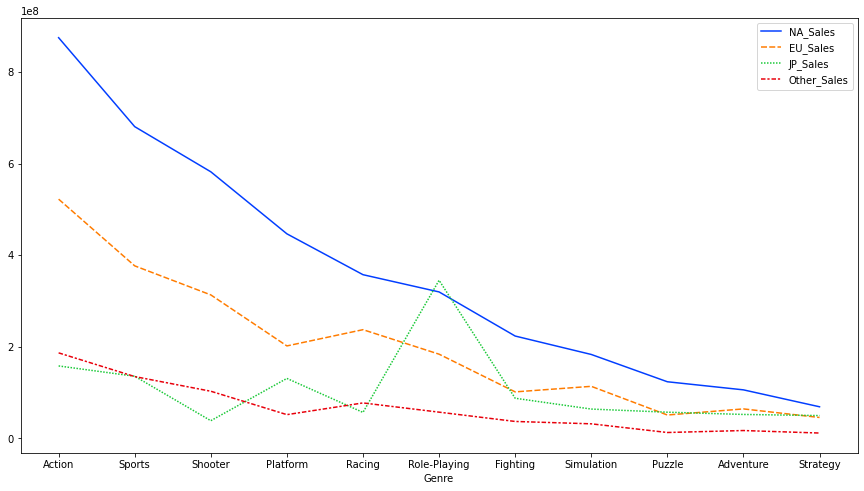

In [ ]:
plt.figure(figsize = (15,8))
sns.lineplot(data = df1)

In [ ]:
df1['NA_Sales_ratio']= df1['NA_Sales'] / df1['NA_Sales'].sum()
df1['EU_Sales_ratio']= df1['EU_Sales'] / df1['EU_Sales'].sum()
df1['JP_Sales_ratio']= df1['JP_Sales'] / df1['JP_Sales'].sum()
df1['Other_Sales_ratio']= df1['Other_Sales'] / df1['Other_Sales'].sum()
df1['Entire_Sales_ratio'] = df1.sum(axis= 1) / df1.sum(axis= 1).sum()

df1 = df1.sort_values(by = 'Entire_Sales_ratio', ascending=False)
df1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,NA_Sales_ratio,EU_Sales_ratio,JP_Sales_ratio,Other_Sales_ratio,Entire_Sales_ratio
Genre,,,,,,,,,
Action,874810000.0,522160000.0,157900000.0,186450000.0,0.220673,0.236416,0.134627,0.259618,0.215938
Sports,680520000.0,376480000.0,135370000.0,134670000.0,0.171663,0.170457,0.115418,0.187518,0.164564
Shooter,581920000.0,313050000.0,38280000.0,102650000.0,0.146790,0.141738,0.032638,0.142933,0.128460
Role-Playing,319540000.0,183580000.0,344950000.0,56960000.0,0.080605,0.083119,0.294108,0.079313,0.112231
Platform,446440000.0,201610000.0,130650000.0,51530000.0,0.112615,0.091282,0.111393,0.071752,0.102955
Racing,357190000.0,237100000.0,56400000.0,77100000.0,0.090102,0.107351,0.048087,0.107356,0.090252
Fighting,223200000.0,101220000.0,87340000.0,36640000.0,0.056303,0.045829,0.074467,0.051019,0.055605
Simulation,182960000.0,113350000.0,63700000.0,31480000.0,0.046152,0.051321,0.054311,0.043834,0.048548
Puzzle,123350000.0,50730000.0,56870000.0,12520000.0,0.031115,0.022969,0.048488,0.017433,0.030192


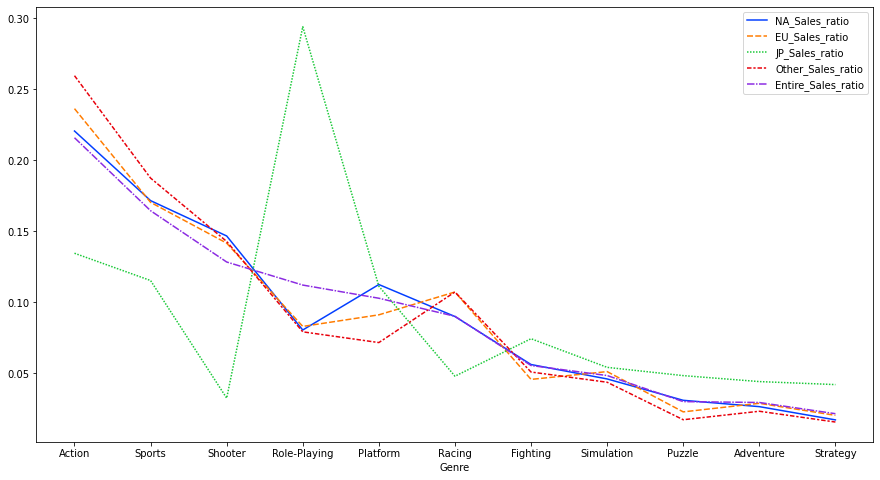

In [ ]:
plt.figure(figsize = (15,8))
sns.lineplot(data = df1.iloc[:,4:9])

In [ ]:
df2 = df[['Genre','Year']]
df2['Entire_Sales'] = df.iloc[:,5:9].sum(axis=1)

bins = list(range(1980, 2021, 10))
bins_label = [str(x)+"s" for x in bins]
df2['Year_10'] = pd.cut(df["Year"], bins, right= False, labels=bins_label[:-1])
df2 = df2.drop('Year',axis=1)

df2 = df2.groupby(['Genre','Year_10']).sum().reset_index(drop = False)
df2 = df2.drop(df2.loc[(df2['Genre']=='Misc')|(df2['Genre']=='Unknown')].index)
df2 = df2.dropna()

Year_list = ['1980s', '1990s', '2000s', '2010s']
Year_list_condition = [(df2['Year_10']=='1980s'), (df2['Year_10']=='1990s'), (df2['Year_10']=='2000s'), (df2['Year_10']=='2010s')]
Year_sales = []

for i in Year_list:
  Year_sales.append(df2[df2['Year_10']== i].Entire_Sales.sum())

df2['Year_sales'] = np.select(Year_list_condition, Year_sales)
df2['Entire_Sales_Ratio'] = df2['Entire_Sales'] / df2['Year_sales']
df2 =df2.drop('Year_sales',axis=1)
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Genre,Year_10,Entire_Sales,Entire_Sales_Ratio
0,Action,1980s,51100000.0,0.139032
1,Action,1990s,139150000.0,0.114833
2,Action,2000s,853130000.0,0.206366
3,Action,2010s,669640000.0,0.295955
4,Adventure,1980s,4780000.0,0.013005
5,Adventure,1990s,44800000.0,0.036971
6,Adventure,2000s,123770000.0,0.029939
7,Adventure,2010s,60870000.0,0.026902
8,Fighting,1980s,7240000.0,0.019699
9,Fighting,1990s,123510000.0,0.101926


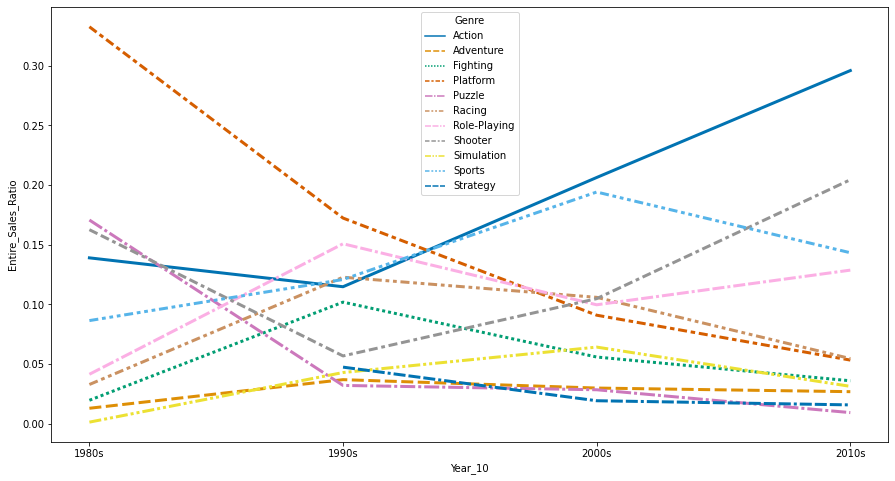

In [ ]:
plt.figure(figsize = (15,8))
sns.lineplot(x='Year_10', y='Entire_Sales_Ratio', data=df2, hue='Genre',linewidth=3,style='Genre',palette = 'colorblind')

In [ ]:
df['Entire_Sales'] = df.iloc[:,5:9].sum(axis=1)
df = df.sort_values(by = 'Entire_Sales', ascending=False,ignore_index=True)
df.head(100)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Entire_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
...,...,...,...,...,...,...,...,...,...,...
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3780000.0,2170000.0,1310000.0,310000.0,7570000.0
96,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5390000.0,1180000.0,700000.0,190000.0,7460000.0
97,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3240000.0,1350000.0,2420000.0,430000.0,7440000.0
98,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4790000.0,1900000.0,0.0,690000.0,7380000.0


In [ ]:
df3 = df.loc[0:99]
df3_genre = df3.groupby('Genre').sum().drop('Year',axis=1).sort_values('Entire_Sales', ascending=False)
df3_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Entire_Sales
Genre,,,,,
Shooter,155620000.0,72280000.0,4420000.0,25270000.0,257590000.0
Platform,138080000.0,54820000.0,46640000.0,12400000.0,251940000.0
Role-Playing,71740000.0,50590000.0,59410000.0,9340000.0,191080000.0
Sports,78960000.0,66610000.0,13900000.0,17530000.0,177000000.0
Action,69250000.0,50190000.0,8930000.0,28530000.0,156900000.0
Racing,60210000.0,44810000.0,24640000.0,18280000.0,147940000.0
Misc,59490000.0,36450000.0,10920000.0,10620000.0,117480000.0
Simulation,14610000.0,23260000.0,11620000.0,4750000.0,54240000.0
Puzzle,33920000.0,8070000.0,9540000.0,1840000.0,53370000.0


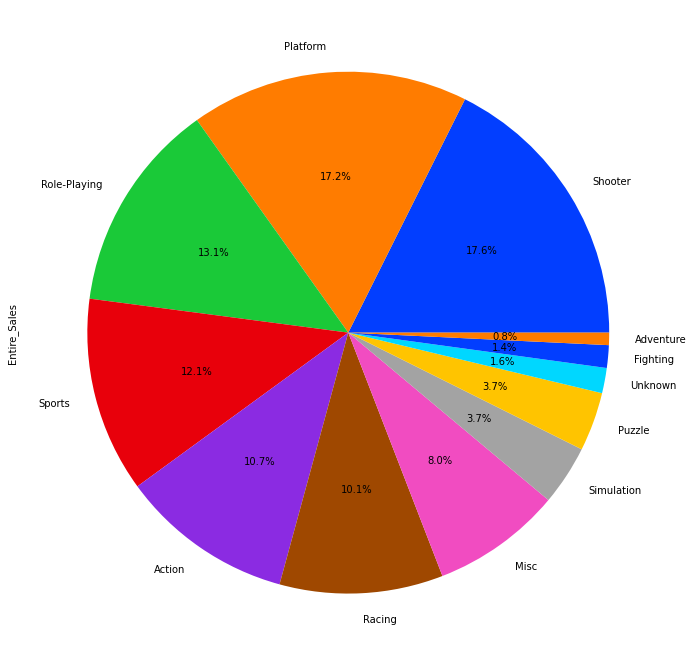

In [ ]:
df3_genre.plot.pie(y = 'Entire_Sales',autopct='%0.1f%%',legend=False,figsize=(12,12))

In [ ]:
df3_publisher = df3.groupby('Publisher').sum().drop('Year',axis=1).sort_values('Entire_Sales', ascending=False)
df3_publisher

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Entire_Sales
Publisher,,,,,
Nintendo,439230000.0,246290000.0,177040000.0,57760000.0,920320000.0
Activision,87050000.0,55520000.0,3430000.0,19930000.0,165930000.0
Take-Two Interactive,59690000.0,40480000.0,3390000.0,25590000.0,129150000.0
Sony Computer Entertainment,30420000.0,23980000.0,15330000.0,13430000.0,83160000.0
Microsoft Game Studios,49000000.0,16470000.0,560000.0,5240000.0,71270000.0
Electronic Arts,10540000.0,22950000.0,470000.0,5900000.0,39860000.0
Ubisoft,11890000.0,6040000.0,10000.0,1850000.0,19790000.0
Bethesda Softworks,5030000.0,2860000.0,100000.0,850000.0,8840000.0
Sega,2580000.0,3900000.0,660000.0,910000.0,8050000.0


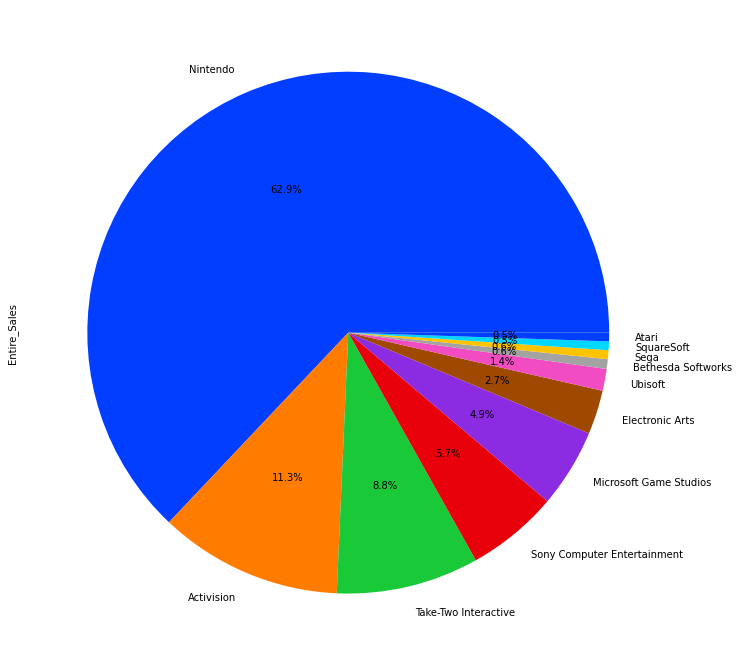

In [ ]:
df3_publisher.plot.pie(y = 'Entire_Sales',autopct='%0.1f%%',legend=False,figsize=(12,12))

In [ ]:
df4 = df.drop(df[df['Publisher']=='Nintendo'].index).reset_index(drop=True).loc[0:99]
df4

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Entire_Sales
0,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14970000.0,4940000.0,240000.0,1670000.0,21820000.0
1,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7010000.0,9270000.0,970000.0,4140000.0,21390000.0
2,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9430000.0,400000.0,410000.0,10570000.0,20810000.0
3,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9630000.0,5310000.0,60000.0,1380000.0,16380000.0
4,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8410000.0,5490000.0,470000.0,1780000.0,16150000.0
...,...,...,...,...,...,...,...,...,...,...
95,Batman: Arkham City,PS3,2011.0,Action,Warner Bros. Interactive Entertainment,2700000.0,1910000.0,110000.0,800000.0,5520000.0
96,Monster Hunter Freedom Unite,PSP,2008.0,Role-Playing,Capcom,470000.0,570000.0,4130000.0,340000.0,5510000.0
97,Call of Duty: World at War,PS3,2008.0,Shooter,Activision,2720000.0,1870000.0,0.0,840000.0,5430000.0
98,Minecraft,PS3,2014.0,Misc,Sony Computer Entertainment,1970000.0,2510000.0,0.0,940000.0,5420000.0


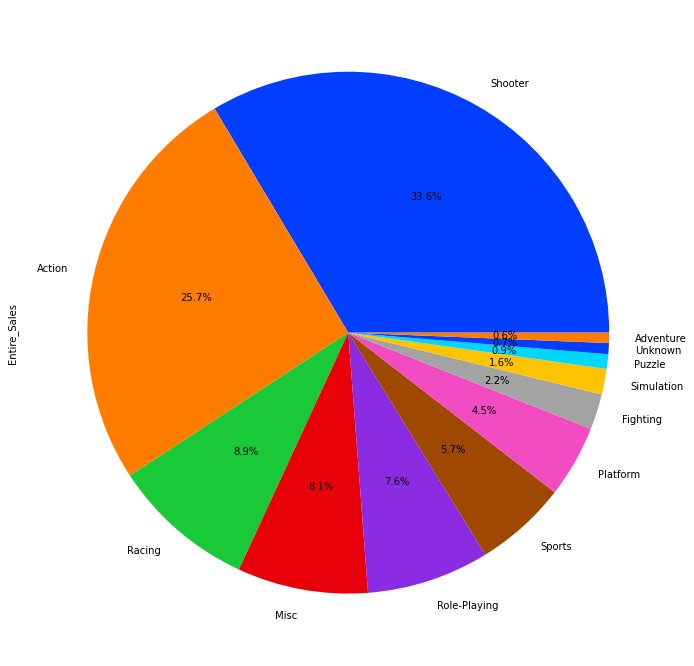

In [ ]:
df4_genre = df4.groupby('Genre').sum().sort_values('Entire_Sales', ascending=False)
df4_genre.plot.pie(y = 'Entire_Sales',autopct='%0.1f%%',legend=False,figsize=(12,12))

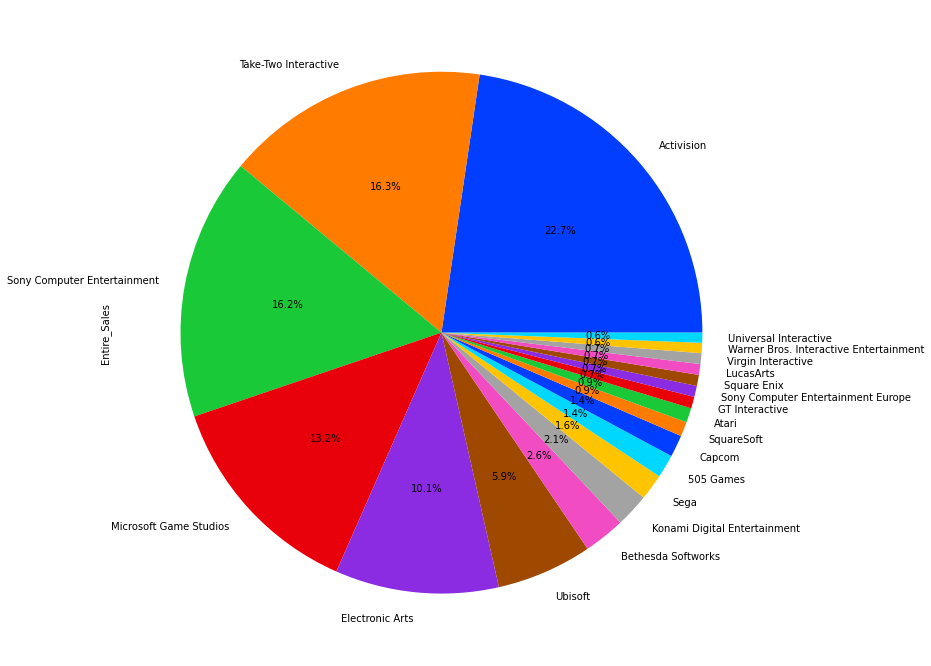

In [ ]:
df4_publisher = df4.groupby('Publisher').sum().sort_values('Entire_Sales', ascending=False)
df4_publisher.plot.pie(y = 'Entire_Sales',autopct='%0.1f%%',legend=False,figsize=(12,12))